# DEEPLEARNING_CANCER_CLASSICATION

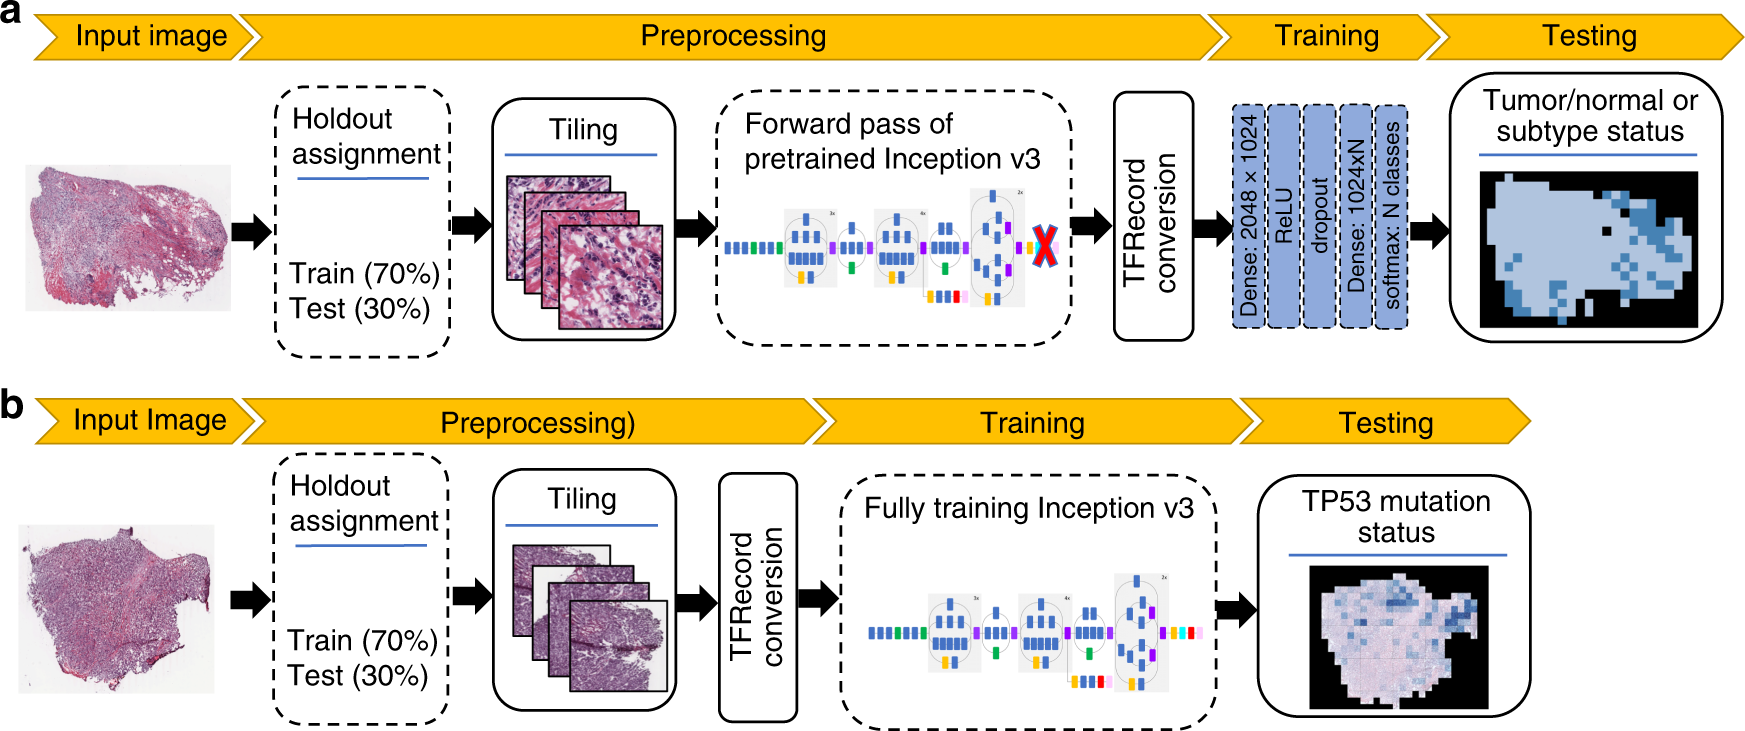

In [1]:
from IPython.display import Image
Image(filename="C:\\Users\\DeLL\\Downloads\\41467_2020_20030_Fig1_HTML.png")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cancer=pd.read_csv("D:\\IBM_Data_Science\\Data_set\\cancer_classification.csv")

In [5]:
cancer.head(5)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  benign_0__mal_1  
0          0.4601                  0.11890                0  
1          0.2750                  0.08902                0  
2          0.3613                  0.08758                0  
3          0.6638                  0.17300                0  
4          0.2364                  0.07678                0  

[5 rows x 31 columns]

**1. Chech type  variable and null Value of Dataframe**

In [7]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**2. Descriptive statictic analysis**

In [9]:
cancer.describe().transpose()

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   
benign_0__mal_1          569.0    0.627417    0.483918    0.000000   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.40000

**3. Describe the relationship between variables**

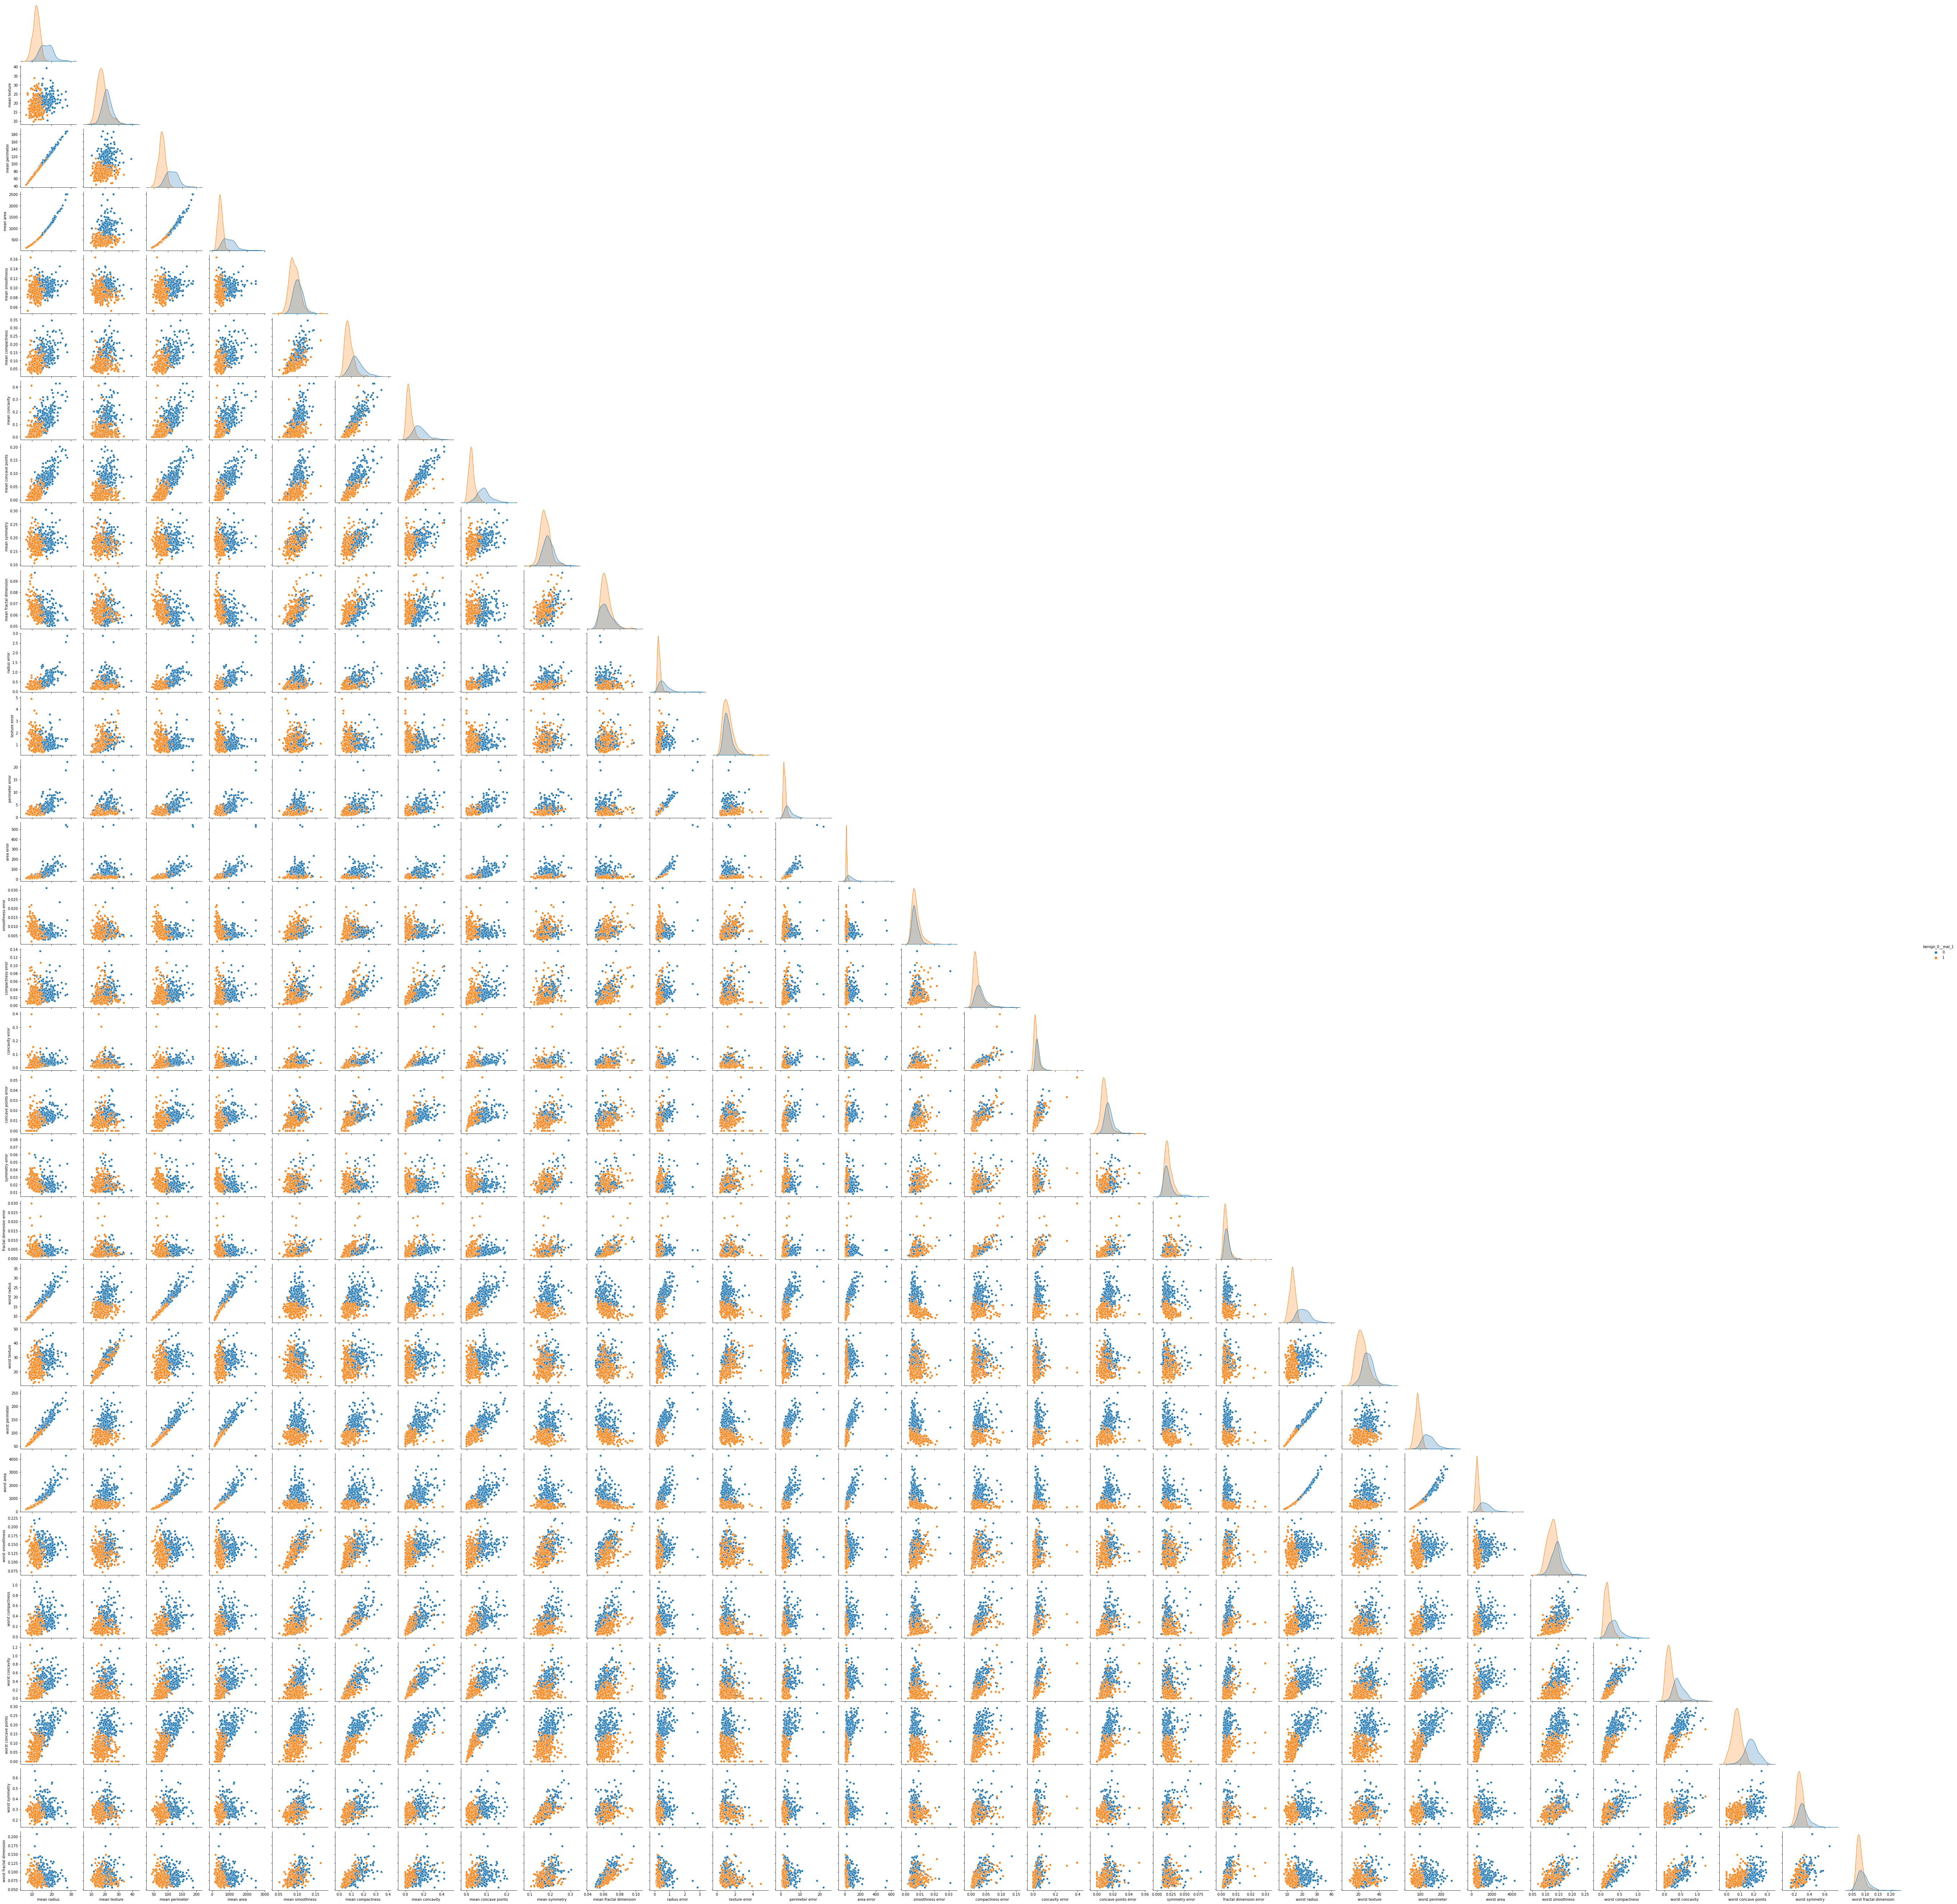

In [11]:
sns.pairplot(cancer, corner=True,hue="benign_0__mal_1")

## 3. Exploratory Data Analysis

Text(0.5, 1.0, 'Compare the number of patients with(1) and without cancer(0)')

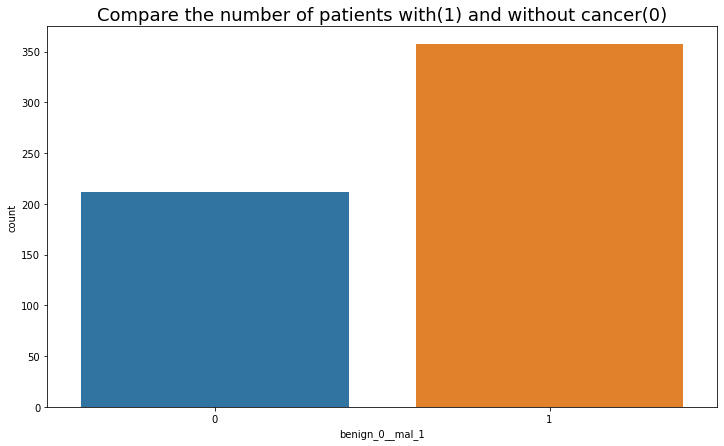

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(x="benign_0__mal_1", data=cancer)
plt.title("Compare the number of patients with(1) and without cancer(0)",fontsize=18)


**Number of patients**
- No cancer about 210 people
- Cancer about 360
**Number* patients with cancer are 1.5 times more than people without and account for 2/3 of the total number of patients going to the doctor

**Corrilation Matrix**

In [16]:
cancer.corr()

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   
benign_0__mal_1            -0.730029     -0.415185       -0.742636  -0.708984   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error        

**Count correlation values by benign_0__mal_1 variable**

In [19]:
# Randomly find values that affect benign_0__mal_1 variables
cancer.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [20]:
cancer.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

**We can see that there are 4 variables that have the greatest influence on the incidence of cancer:**
- symmetry error:  0.006522
- texture error:  0.008303
- mean fractal dimension:  0.012838
- smoothness error:  0.067016

Text(0.5, 1.0, 'The graph shows the rate of influence of variables on the incidence of cancer')

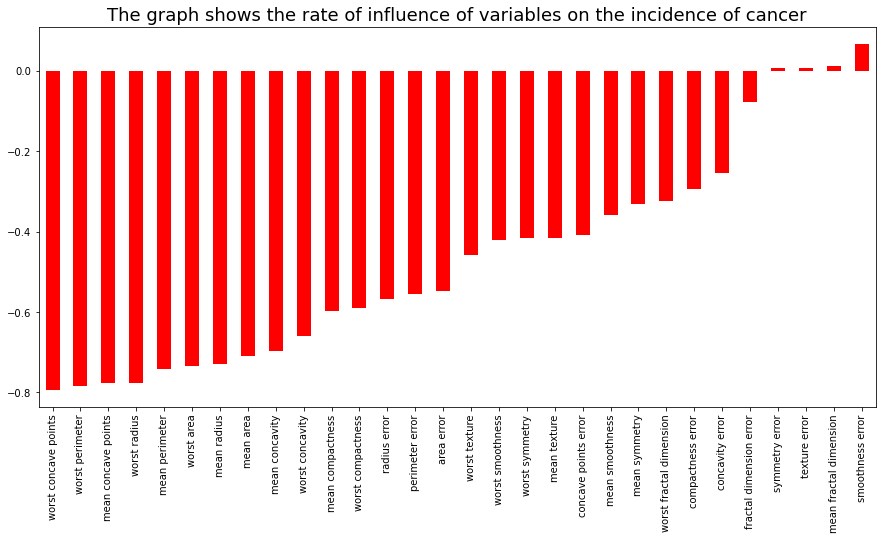

In [25]:
## To make it easier to observe, we proceed to draw a chart
plt.figure(figsize=(15,7))
cancer.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind="bar",color="red")
plt.title("The graph shows the rate of influence of variables on the incidence of cancer",fontsize=18)

<AxesSubplot:>

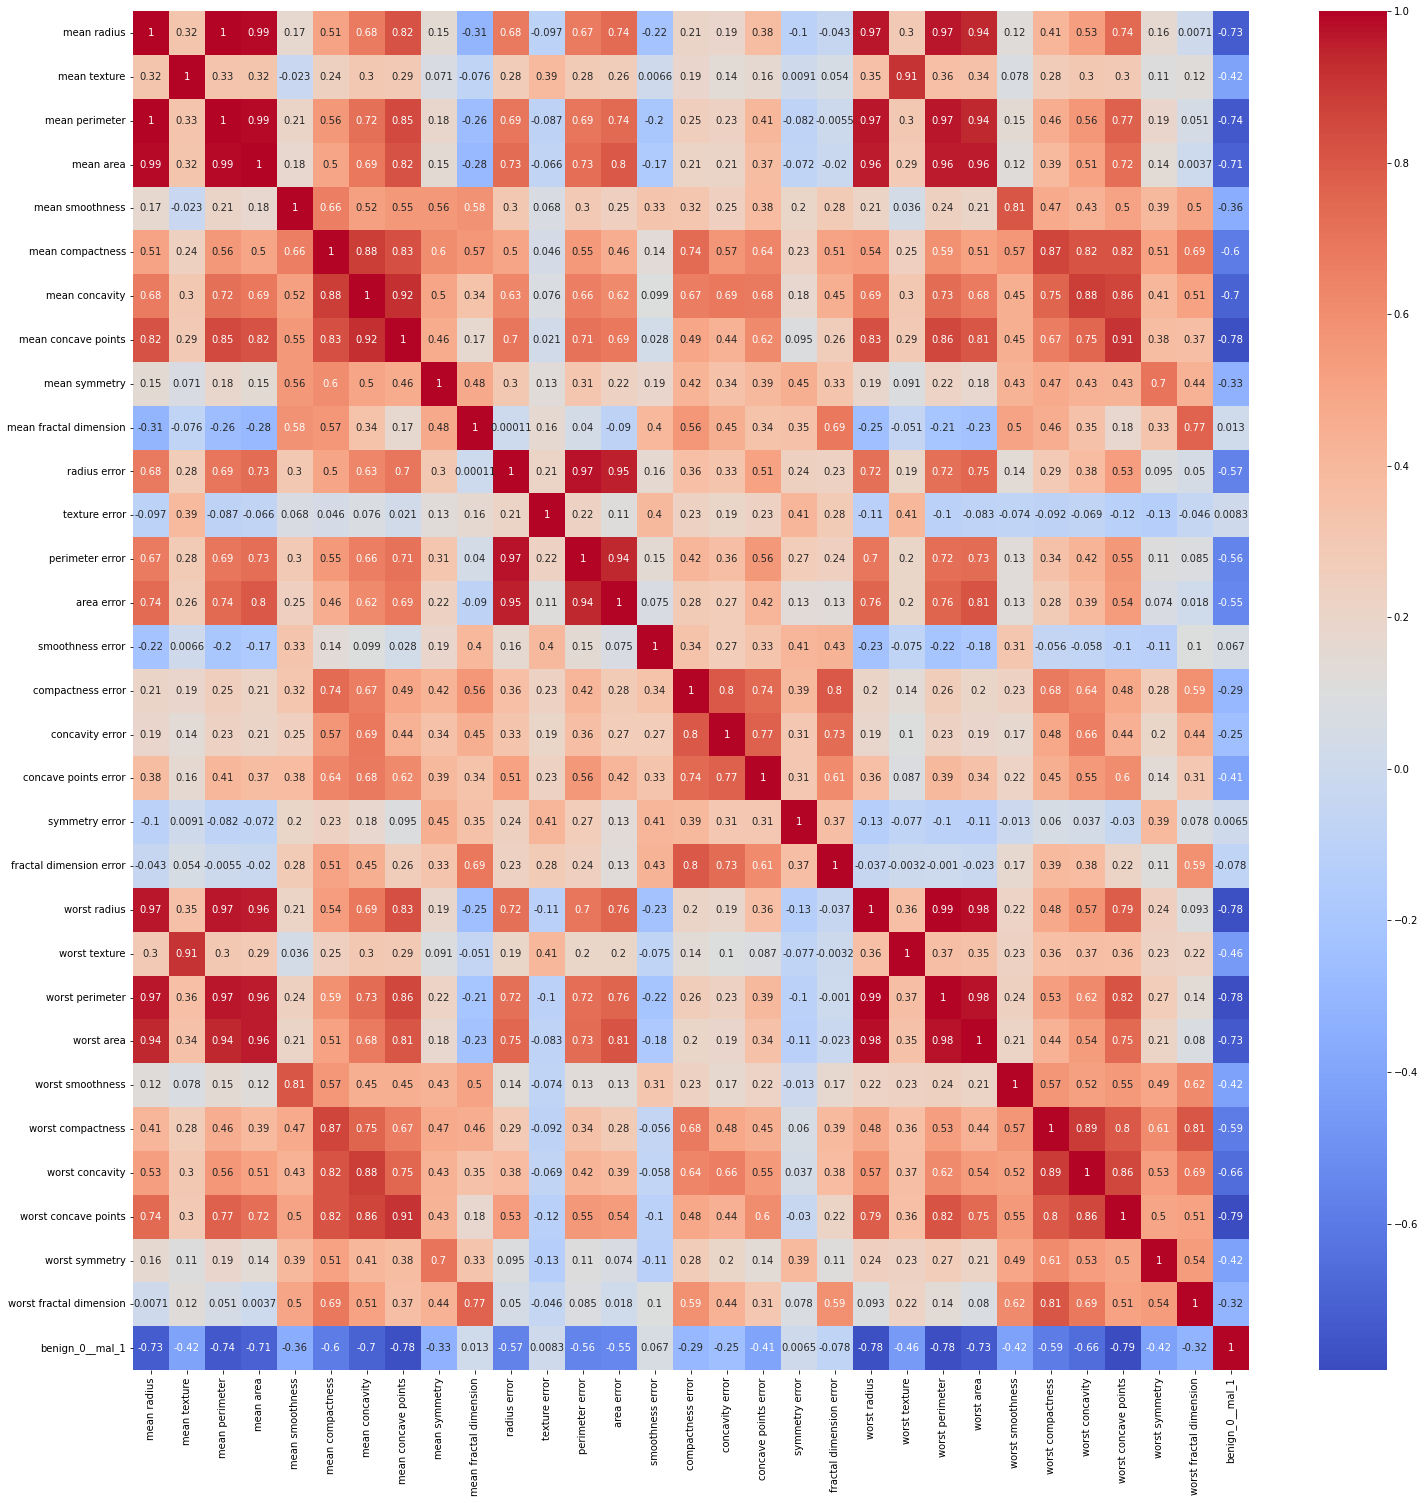

In [30]:
plt.figure(figsize=(25,25))
sns.heatmap(cancer.corr(),annot=True,cmap="coolwarm")

##  Model Selection and Evaluation

In [32]:
# Dependent variable
X=cancer.drop("benign_0__mal_1",axis=1)
X

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [33]:
# Target Variables
y=cancer['benign_0__mal_1']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: benign_0__mal_1, Length: 569, dtype: int64

## Buliding Model

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=101)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler()

In [41]:
X_train=scaler.fit_transform(X_train)

In [43]:
X_test=scaler.fit_transform(X_test)

In [45]:
# Check x_train
X_train.shape


(426, 30)

In [46]:
from tensorflow.keras.models import Sequential

In [47]:
from tensorflow.keras.layers import Dense,Dropout

In [48]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
# BINARY CLASSIFICATION
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [50]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0145 - val_loss: 1.0749
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0144 - val_loss: 0.8519
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 1.2032
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.7120
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0218 - val_loss: 1.0278
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.9617
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0118 - val_loss: 0.9601
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0117 - val_loss: 1.0016
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0116 - val_loss: 0.9283
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0115 - val_loss: 0.9277
Epoch 11/

Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0113 - val_loss: 1.0809
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 1.1133
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 1.1798
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 1.1433
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0112 - val_loss: 1.2525
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0123 - val_loss: 1.0796
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 1.2208
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 1.0933
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 1.1759
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 1.1514


14/14 [==============================] - 0s 6ms/step - loss: 0.0049 - val_loss: 1.5789
Epoch 246/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 1.4621
Epoch 247/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 1.5556
Epoch 248/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0042 - val_loss: 1.3845
Epoch 249/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0062 - val_loss: 1.7792
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 1.3685
Epoch 251/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0054 - val_loss: 1.6120
Epoch 252/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0064 - val_loss: 1.5187
Epoch 253/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 1.5146
Epoch 254/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0050 - val_loss: 1.6511
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 1.9801
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 2.0112
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 1.8264
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 2.1610
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 1.9055
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 2.0690
Epoch 413/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 1.8322
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 2.1678
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 1.9368
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 2.0763
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 2.6128
Epoch 569/600
14/14 [==============================] - 0s 3ms/step - loss: 9.4022e-04 - val_loss: 2.5636
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 9.3535e-04 - val_loss: 2.5034
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 2.6855
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 8.7525e-04 - val_loss: 2.5058
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 8.2055e-04 - val_loss: 2.6100
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 2.4869
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 8.8346e-04 - val_loss: 2.6109
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 9.5826e-04 - val_loss: 2.6179
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 8.1788

In [51]:
model.history.history

{'loss': [0.01452913973480463,
  0.014417558908462524,
  0.025728823617100716,
  0.026878349483013153,
  0.021791398525238037,
  0.013308132998645306,
  0.01177166122943163,
  0.011693148873746395,
  0.011623172089457512,
  0.011456710286438465,
  0.011419619433581829,
  0.011301325634121895,
  0.010995358228683472,
  0.011974852532148361,
  0.011302558705210686,
  0.011267302557826042,
  0.011674847453832626,
  0.013079707510769367,
  0.014779252000153065,
  0.01179593801498413,
  0.01320230308920145,
  0.01561659388244152,
  0.01237272284924984,
  0.01151688490062952,
  0.010721866972744465,
  0.015071549452841282,
  0.014279952272772789,
  0.011264501139521599,
  0.010306070558726788,
  0.01153283566236496,
  0.01072639413177967,
  0.011350354179739952,
  0.011309062130749226,
  0.011383208446204662,
  0.010463569313287735,
  0.014455979689955711,
  0.01212270837277174,
  0.015566663816571236,
  0.012599154375493526,
  0.011325644329190254,
  0.011324191465973854,
  0.01122268754988

In [53]:
pd.DataFrame(model.history.history)

loss  val_loss
0    0.014529  1.074892
1    0.014418  0.851868
2    0.025729  1.203172
3    0.026878  0.712007
4    0.021791  1.027759
..        ...       ...
595  0.004257  2.269807
596  0.026353  2.980568
597  0.043612  3.092268
598  0.099732  1.624497
599  0.062976  2.378927

[600 rows x 2 columns]

<AxesSubplot:>

<Figure size 864x504 with 0 Axes>

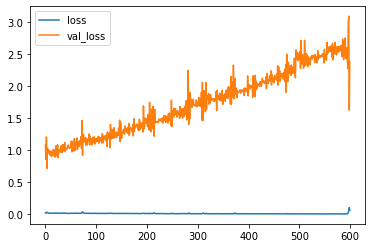

In [56]:
plt.figure(figsize=(12,7))
pd.DataFrame(model.history.history).plot()

## Dealing with Overfitting

In [58]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
 # Binary classification
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer="adam")

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 | 

In [63]:
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=2,patience=25)

In [64]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6953 - val_loss: 0.6878
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6634 - val_loss: 0.6564
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6359 - val_loss: 0.6221
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5998 - val_loss: 0.5843
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5564 - val_loss: 0.5383
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5106 - val_loss: 0.4910
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4674 - val_loss: 0.4395
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4225 - val_loss: 0.3941
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3837 - val_loss: 0.3510
Epoch 10/600
14/14 [==============================] - ETA: 0s - loss: 0.312 - 0s 3ms/step - loss: 0.3442 - v

<AxesSubplot:>

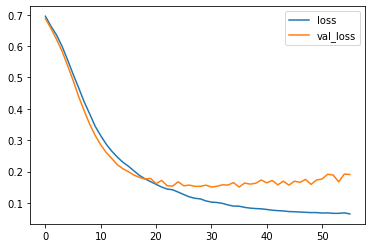

In [65]:
pd.DataFrame(model.history.history).plot()

## Adding dropout layers

In [66]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
 # Binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [67]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6904 - val_loss: 0.6861
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6737 - val_loss: 0.6711
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6543 - val_loss: 0.6536
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6415 - val_loss: 0.6313
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6276 - val_loss: 0.6057
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6297 - val_loss: 0.5835
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5905 - val_loss: 0.5589
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5792 - val_loss: 0.5255
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5445 - val_loss: 0.4900
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5108 - val_loss: 0.4565
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1251 - val_loss: 0.1862
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1121 - val_loss: 0.1734
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1279 - val_loss: 0.1783
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1110 - val_loss: 0.1650
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1027 - val_loss: 0.1709
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1142 - val_loss: 0.1393
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0927 - val_loss: 0.1663
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1399 - val_loss: 0.1783
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1039 - val_loss: 0.1674
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1283 - val_loss: 0.1671
Epoch 93/600


<AxesSubplot:>

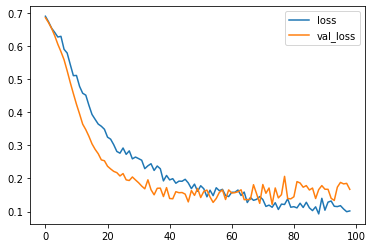

In [68]:
pd.DataFrame(model.history.history).plot()

In [70]:
predictions=(model.predict(X_test)>8.5).astype("int32")

In [73]:
predictions.shape

(143, 1)

In [75]:
pd.DataFrame(predictions,columns=['class'])

class
0        0
1        0
2        0
3        0
4        0
..     ...
138      0
139      0
140      0
141      0
142      0

[143 rows x 1 columns]

## Evaluation model

In [82]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.38      1.00      0.56        55
           1       0.00      0.00      0.00        88

    accuracy                           0.38       143
   macro avg       0.19      0.50      0.28       143
weighted avg       0.15      0.38      0.21       143



C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
print(confusion_matrix(y_test,predictions))

[[55  0]
 [88  0]]
